In [2]:
import deepchem as dc
import pandas as pd
import numpy as np
from rdkit import Chem

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300

Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
# Load the dataset from CSV file
data = pd.read_csv('../data/GABAA.csv', encoding='gb18030')

In [11]:
data

,name,origin,label,smiles,class
0,gamma-Aminobutyric acid,10.3390/molecules24152678,GABAA agonist,C(CC(=O)O)CN,1
1,Menthol,10.1111/bph.12602,GABAA agonist,CC1CCC(C(C1)O)C(C)C,1
2,phenobarbital,10.1002/ana.24967,GABAA agonist,CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2,1
3,isoguvacine oxide,10.1002/chir.530070608,GABAA agonist,C1CNCC2C1(O2)C(=O)O,1
4,Clomethiazole,10.1016/s0014-2999(02)02233-1,GABAA agonist,CC1=C(CCCl)SC=N1,1
...,...,...,...,...,...
483,chlorogenic acid,10.1021/jf0303971,GABAA inhibition,C1C(C(C(CC1(C(=O)O)O)OC(=O)C=CC2=CC(=C(C=C2)O)...,0
484,maltol,10.1021/jf0303971,GABAA inhibition,CC1=C(C(=O)C=CO1)O,0
485,Theobromine,10.1021/jf0303971,GABAA inhibition,CN1C=NC2=C1C(=O)NC(=O)N2C,0
486,"2,3,5-trimethylpyrazine",10.1021/jf0303971,GABAA inhibition,CN1C2=C(C(=O)N(C1=O)C)NC=N2,0


### ECFP4

In [12]:
data['smiles']

0                                           C(CC(=O)O)CN
1                                    CC1CCC(C(C1)O)C(C)C
2                      CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2
3                                    C1CNCC2C1(O2)C(=O)O
4                                       CC1=C(CCCl)SC=N1
                             ...                        
483    C1C(C(C(CC1(C(=O)O)O)OC(=O)C=CC2=CC(=C(C=C2)O)...
484                                   CC1=C(C(=O)C=CO1)O
485                            CN1C=NC2=C1C(=O)NC(=O)N2C
486                          CN1C2=C(C(=O)N(C1=O)C)NC=N2
487                                   CC1=CN=C(C(=N1)C)C
Name: smiles, Length: 488, dtype: object

In [23]:
# Create an ECFP4 featurizer with a size of 1024 bits and radius 4
featurizer = dc.feat.CircularFingerprint(size=1024,radius=4)

# Featurize the SMILES of agonist and antagonist compounds (first 244 for agonists, the rest for antagonists)
agonist_features = featurizer.featurize(data['smiles'][0:244])
antagonist_features = featurizer.featurize(data['smiles'][244:])

D:\anaconda\envs\PI3K\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\anaconda\envs\PI3K\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:>

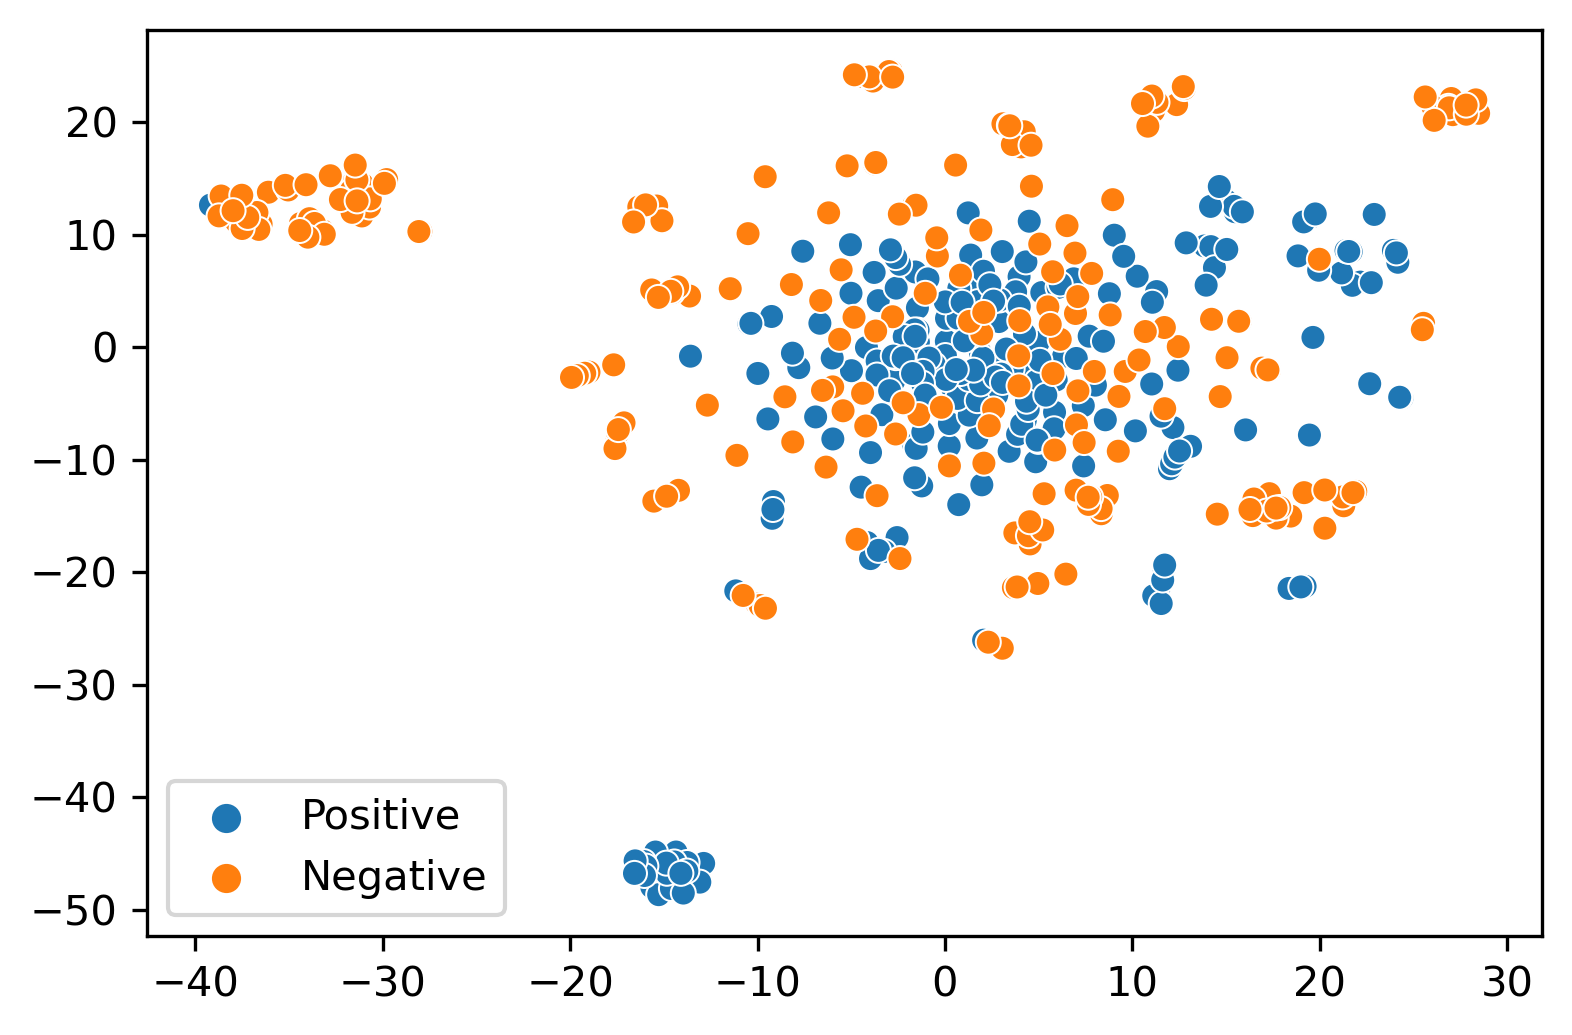

In [24]:
# Concatenate the features for both agonists and antagonists
data_ecfp = np.concatenate((agonist_features, antagonist_features), axis=0)

# Perform t-SNE dimensionality reduction to reduce the feature space to 2D
tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(data_ecfp)

# Visualize the data using a scatter plot, coloring agonists and antagonists
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], hue=['Positive']*244 + ['Negative']*244)

# MACCSKeys

In [25]:
# Create a MACCS Keys featurizer
featurizer = dc.feat.MACCSKeysFingerprint()

# Featurize the SMILES of agonist and antagonist compounds
agonist_features = featurizer.featurize(data['smiles'][0:244])
antagonist_features = featurizer.featurize(data['smiles'][244:])

D:\anaconda\envs\PI3K\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\anaconda\envs\PI3K\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:>

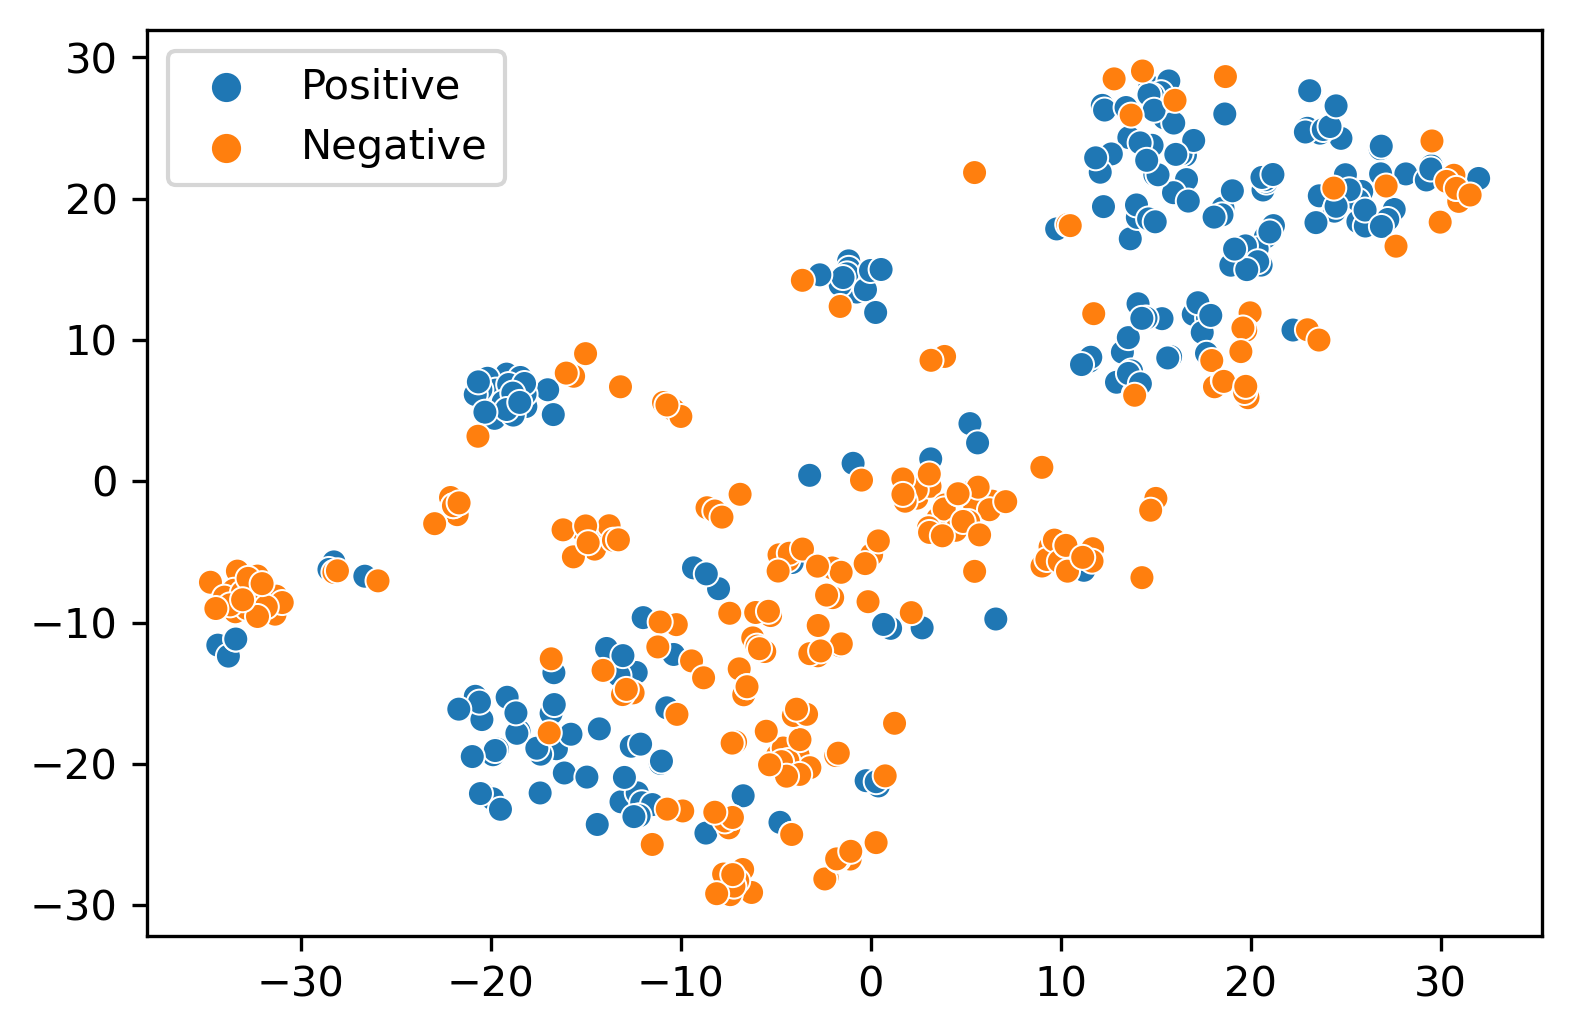

In [26]:
# Concatenate the features for both agonists and antagonists
data_maccs = np.concatenate((agonist_features, antagonist_features), axis=0)

# Perform t-SNE dimensionality reduction to reduce the feature space to 2D
tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(data_maccs)

# Visualize the data using a scatter plot, coloring agonists and antagonists
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1],hue=['Positive']*244 + ['Negative']*244)

# RDkit

In [27]:
featurizer = dc.feat.RDKitDescriptors()
agonist_features = featurizer.featurize(data['smiles'][0:244])
antagonist_features = featurizer.featurize(data['smiles'][244:])

D:\anaconda\envs\PI3K\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
D:\anaconda\envs\PI3K\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:>

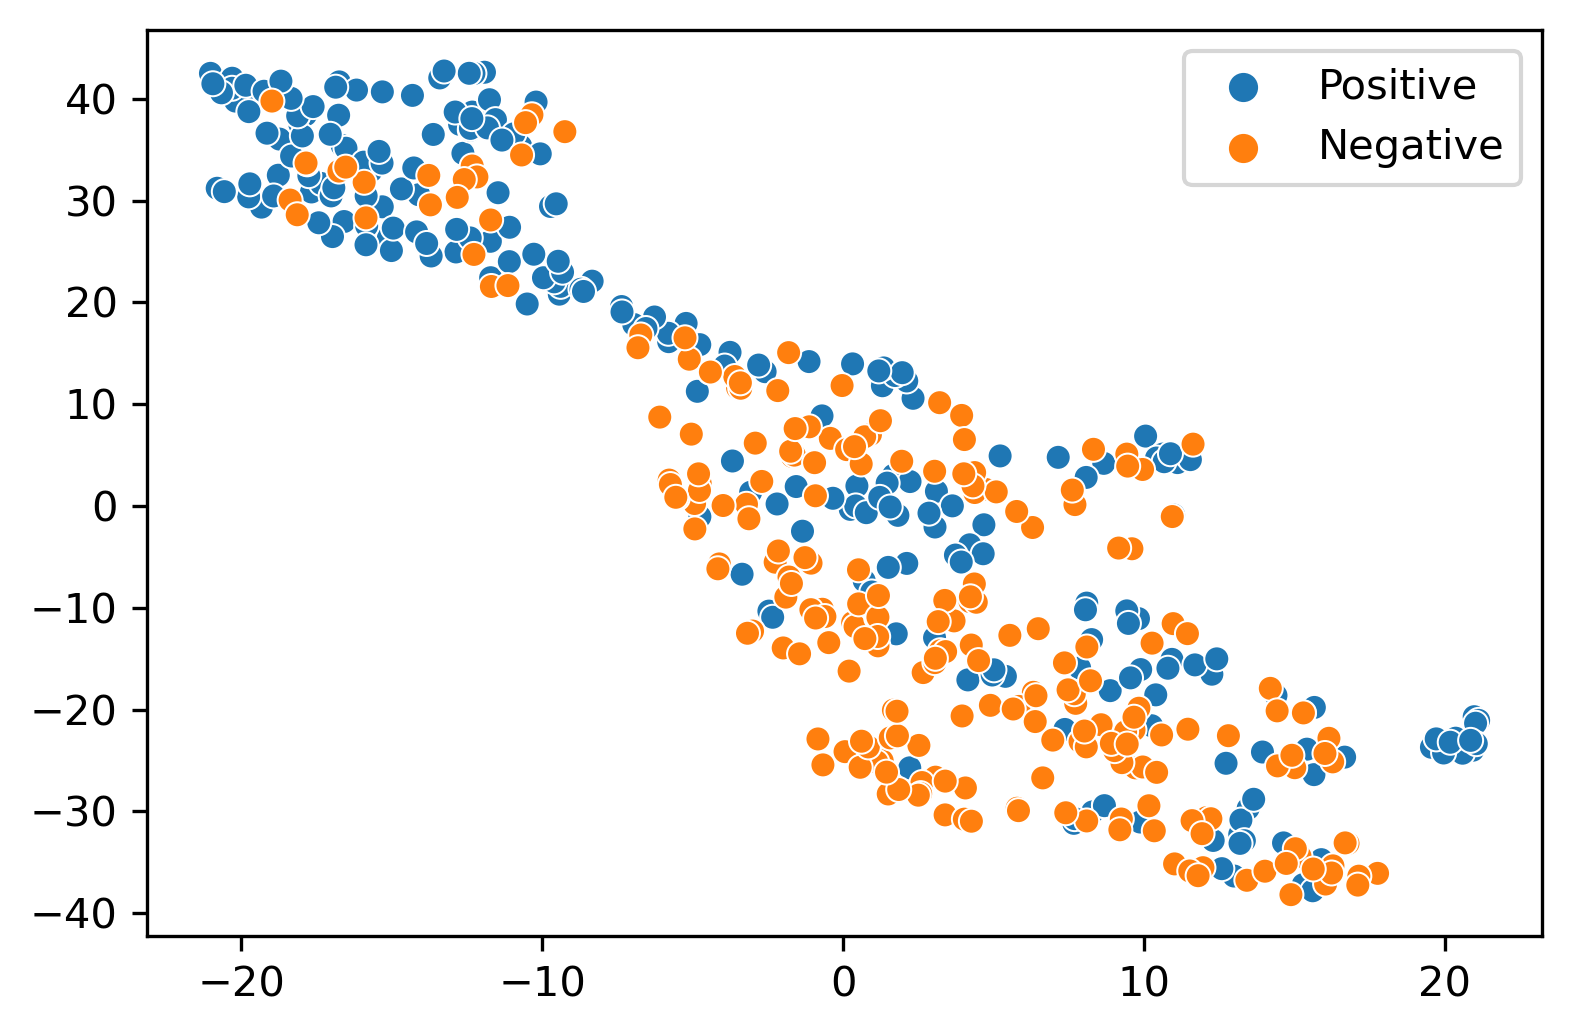

In [28]:
data_rdkit = np.concatenate((agonist_features, antagonist_features), axis=0)


tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(data_rdkit)


sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1],hue=['Positive']*244 + ['Negative']*244)

# origin and external

In [5]:
data = pd.read_csv('GABAA.csv',encoding='gb18030')

In [3]:
plant = pd.read_csv('plant.csv',encoding='gb18030')

In [6]:
featurizer = dc.feat.RDKitDescriptors()
data_features = featurizer.featurize(data['smiles'])
plant_features = featurizer.featurize(plant['SMILES'])

D:\Miniconda\envs\bittersweet\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Miniconda\envs\bittersweet\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

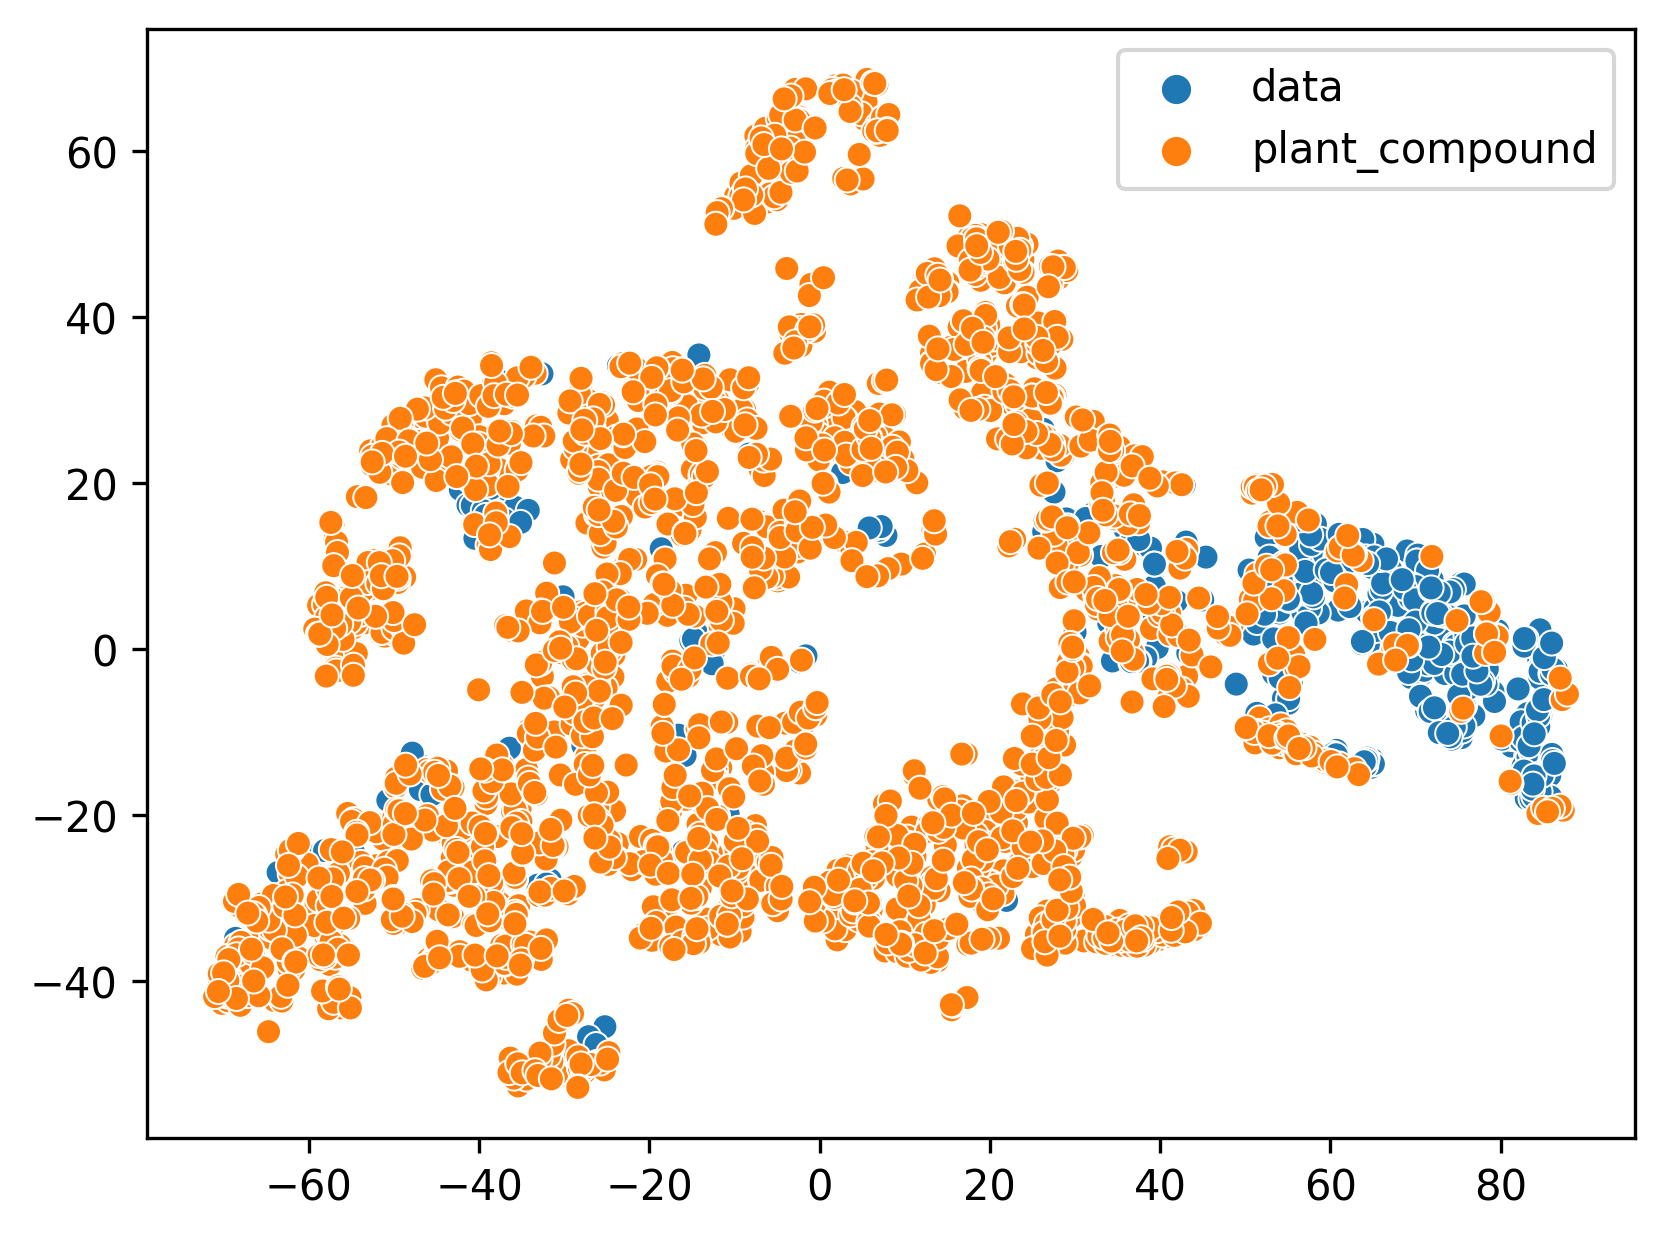

In [7]:
# Concatenate the features for both datasets
data_rdkit = np.concatenate((data_features, plant_features), axis=0)

# Perform t-SNE dimensionality reduction to reduce the feature space to 2D
tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(data_rdkit)

# Visualize the data using a scatter plot, coloring the origin data and plant data
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], hue=['data']*488 + ['plant_compound']*2394)